In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

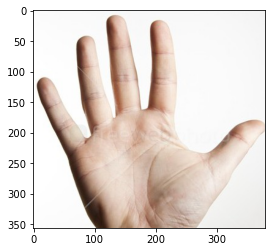

In [52]:
PATH = r'./DIP/img'
fstr = 'hand.jpg'
#fstr = 'hand2.gif'
win_title = 'backprojection'

img = cv2.imread(os.path.join(PATH,fstr))
plt.imshow(img[:,:,::-1])
plt.show()

In [48]:
def extract_roi(bp, img, win_title):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
    bp_filtered = cv2.filter2D(bp, -1, disc)
    _, mask = cv2.threshold(bp,1,255,cv2.THRESH_BINARY)
    ret = np.zeros_like(img)
    ret = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_title, ret)

In [49]:
def backproj(roi_hs_hist,img, img_hsv):
    bp = cv2.calcBackProject( [img_hsv], [0,1], roi_hs_hist, [0,180, 0,256], 1)
    extract_roi(bp, img, 'extracted_roi')

In [53]:
(x,y,w,h) = cv2.selectROI(win_title, img, True)

draw    = img.copy()
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

if w>0 and h>0:
    roi = draw[y:y+h, x:x+h]
    cv2.rectangle(draw, (x,y), (x+w,y+h), (255,0,0), 2)
    
    roi_hsv  = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
    roi_hs_hist = cv2.calcHist([roi_hsv], [0,1], None, [180,256], [0,180, 0,256])
    
    backproj(roi_hs_hist, img, img_hsv)
    
cv2.imshow(win_title, draw)
cv2.waitKey(0)
cv2.destroyAllWindows()